In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/training.csv')

In [4]:
feature_cols = 'axdt_var,aydt_var,gzdt_var'.split(',')

In [3]:
df.head()

,motion_state,adt_sum,gdt_sum,axdt_var,aydt_var,azdt_var,gxdt_var,gydt_var,gzdt_var,adt_var,gdt_var,adt_min,gdt_min,adt_max,gdt_max
0,straight,9.498792,0.008515,0.000004,0.000001,0.000006,3.856139e-09,2.467973e-09,1.958251e-09,0.000006,1.076465e-09,0.093785,0.000026,0.101785,0.000171
1,straight,9.799902,0.008413,0.000004,0.000001,0.000007,3.463234e-09,2.769963e-09,1.785013e-09,0.000006,1.299795e-09,0.094010,0.000015,0.101634,0.000167
2,rest,9.792245,0.009893,0.000004,0.000001,0.000007,3.881253e-09,3.281482e-09,3.870479e-09,0.000007,1.794662e-09,0.093513,0.000010,0.101982,0.000219
3,rest,9.796759,0.009319,0.000004,0.000001,0.000008,3.439800e-09,3.309496e-09,2.681825e-09,0.000008,1.547565e-09,0.093461,0.000017,0.102362,0.000206
4,straight,9.806574,0.009778,0.000003,0.000008,0.000006,5.623301e-09,2.478434e-09,2.738851e-09,0.000006,1.621392e-09,0.093818,0.000032,0.102166,0.000213


In [5]:
# Target vector 
y = df['motion_state'].copy()


In [6]:
# Featureset
X = df[[col for col in df.columns if col !='motion_state']].copy()
X = df[feature_cols]

In [7]:
X.head()

,axdt_var,aydt_var,gzdt_var
0,0.000004,0.000001,1.958251e-09
1,0.000004,0.000001,1.785013e-09
2,0.000004,0.000001,3.870479e-09
3,0.000004,0.000001,2.681825e-09
4,0.000003,0.000008,2.738851e-09


In [8]:
y.head()

0    straight
1    straight
2        rest
3        rest
4    straight
Name: motion_state, dtype: object

In [9]:
print(f"X is of type {type(X)} and size {X.shape}")
print(f"y is of type {type(y)} and size {y.shape}")

X is of type <class 'pandas.core.frame.DataFrame'> and size (259, 3)
y is of type <class 'pandas.core.series.Series'> and size (259,)


In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   axdt_var  259 non-null    float64
 1   aydt_var  259 non-null    float64
 2   gzdt_var  259 non-null    float64
dtypes: float64(3)
memory usage: 6.2 KB


In [11]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [12]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [13]:
clf = GaussianNB()

In [14]:
clf.fit(X_train, y_train)

GaussianNB()

In [16]:
print("Test-set score: {:.2f}".format(clf.score(X_train, y_train)))
print("Test-set score: {:.2f}".format(clf.score(X_test, y_test)))

Test-set score: 0.73
Test-set score: 0.71


In [17]:
df2 = pd.read_csv('data/testing.csv')
df2.head()

,motion_state,adt_sum,gdt_sum,axdt_var,aydt_var,azdt_var,gxdt_var,gydt_var,gzdt_var,adt_var,gdt_var,adt_min,gdt_min,adt_max,gdt_max
0,rest,4.602953,0.004064,0.000006,0.000003,0.000012,4.162347e-09,2.158534e-09,1.662997e-09,0.000012,1.818951e-09,0.093153,0.000020,0.102891,0.000189
1,rest,9.795434,0.008478,0.000005,0.000002,0.000008,3.614823e-09,2.118414e-09,2.392751e-09,0.000008,1.380667e-09,0.093168,0.000013,0.102563,0.000162
2,straight,9.793045,0.008932,0.000004,0.000001,0.000007,3.623142e-09,2.669124e-09,2.515259e-09,0.000007,1.120863e-09,0.093440,0.000033,0.102174,0.000179
3,straight,9.808845,0.009974,0.000004,0.000021,0.000009,6.206409e-09,2.755071e-09,2.981368e-09,0.000009,2.348890e-09,0.092092,0.000014,0.103117,0.000243
4,turn,9.880517,0.030474,0.000006,0.000014,0.000003,9.496197e-09,8.561489e-09,1.525361e-08,0.000003,1.464841e-08,0.094830,0.000055,0.103888,0.000521


In [18]:
y2 = df2['motion_state'].copy()
X2 =  df2[feature_cols]

In [19]:
X2.head()

,axdt_var,aydt_var,gzdt_var
0,0.000006,0.000003,1.662997e-09
1,0.000005,0.000002,2.392751e-09
2,0.000004,0.000001,2.515259e-09
3,0.000004,0.000021,2.981368e-09
4,0.000006,0.000014,1.525361e-08


In [20]:
# Evaluate the accuracy of the first dataset 
print("Test-set score: {:.2f}".format(clf.score(X2, y2)))

Test-set score: 0.77


In [21]:
df3 = pd.read_csv('data/testing2.csv')
df3.head()


,motion_state,adt_sum,gdt_sum,axdt_var,aydt_var,azdt_var,gxdt_var,gydt_var,gzdt_var,adt_var,gdt_var,adt_min,gdt_min,adt_max,gdt_max
0,rest,2.545991,0.003137,2.620811e-07,0.000002,2.229108e-07,5.920816e-09,3.321791e-09,5.625258e-09,2.209511e-07,2.283056e-09,0.096978,0.000040,0.098823,0.000241
1,rest,9.791828,0.011956,2.337172e-07,0.000002,1.875037e-07,7.127246e-09,4.748617e-09,4.005550e-09,1.906057e-07,2.450247e-09,0.096799,0.000039,0.099082,0.000271
2,rest,9.791926,0.012479,2.776219e-07,0.000002,9.885091e-08,8.415966e-09,3.900123e-09,4.623897e-09,9.991127e-08,2.849623e-09,0.097155,0.000027,0.098707,0.000302
3,rest,9.793009,0.011842,2.813144e-07,0.000002,8.021861e-08,8.668215e-09,3.261839e-09,3.373985e-09,8.170654e-08,2.743603e-09,0.097284,0.000012,0.098749,0.000275
4,rest,9.791697,0.011758,3.282090e-07,0.000002,1.095458e-07,6.701061e-09,4.993413e-09,4.006629e-09,1.070334e-07,3.224875e-09,0.097299,0.000008,0.099036,0.000269


In [22]:
y3 = df3['motion_state'].copy()
X3 = df3[[col for col in df3.columns if col !='motion_state']].copy()
X3 = df3[feature_cols]

In [23]:
print("Test-set score: {:.2f}".format(clf.score(X3, y3)))

Test-set score: 0.56


In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_classification(true_values, predicted_values, ticklabels, model):
    # Calculate confusion matrix
    confusion_mat = confusion_matrix(true_values, predicted_values)
    
    # Plot heatmap
    sns.heatmap(confusion_mat, xticklabels=ticklabels, yticklabels=ticklabels, annot=True, fmt='d', cbar=False, cmap='viridis')
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Confusion Matrix - ' + model)
    plt.show()

    # Calculate scores
    accuracy = accuracy_score(true_values, predicted_values)
    precision = precision_score(true_values, predicted_values, average='macro')
    recall = recall_score(true_values, predicted_values, average='macro')
    f1 = f1_score(true_values, predicted_values, average='macro')

    '''# Calculate additional metrics
    tn, fp, fn, tp = confusion_mat.ravel()

    # Print additional metrics
    print("Metrics for", model)
    print("True Negatives:", tn)
    print("False Positives:", fp)
    print("False Negatives:", fn)
    print("True Positives:", tp)'''

    # Print classification report
    print("\nClassification Report for", model + ":")
    print(classification_report(true_values, predicted_values))

    # Print scores
    print("\nAccuracy Score:", accuracy)
    print("Precision Score:", precision)
    print("Recall Score:", recall)
    print("F1 Score:", f1)   

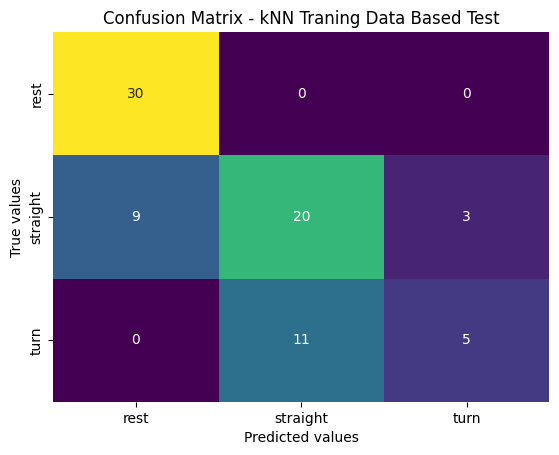


Classification Report for kNN Traning Data Based Test:
              precision    recall  f1-score   support

        rest       0.77      1.00      0.87        30
    straight       0.65      0.62      0.63        32
        turn       0.62      0.31      0.42        16

    accuracy                           0.71        78
   macro avg       0.68      0.65      0.64        78
weighted avg       0.69      0.71      0.68        78


Accuracy Score: 0.7051282051282052
Precision Score: 0.67979735318445
Recall Score: 0.6458333333333334
F1 Score: 0.6403841729928686


In [25]:
evaluate_classification(y_test, clf.predict(X_test), ['rest', 'straight','turn'], 'kNN Traning Data Based Test')

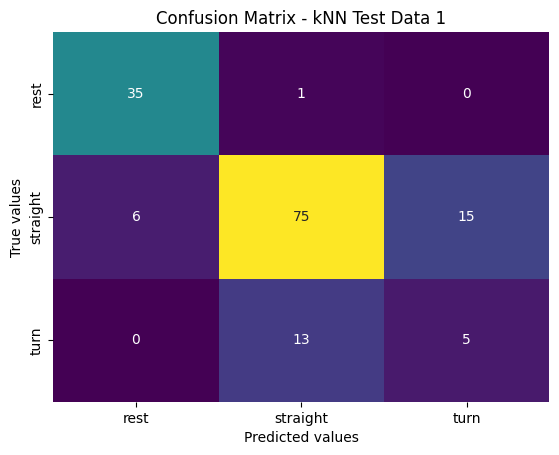


Classification Report for kNN Test Data 1:
              precision    recall  f1-score   support

        rest       0.85      0.97      0.91        36
    straight       0.84      0.78      0.81        96
        turn       0.25      0.28      0.26        18

    accuracy                           0.77       150
   macro avg       0.65      0.68      0.66       150
weighted avg       0.77      0.77      0.77       150


Accuracy Score: 0.7666666666666667
Precision Score: 0.6487850552662829
Recall Score: 0.6770833333333334
F1 Score: 0.6610198715461874


In [26]:
evaluate_classification(y2, clf.predict(X2), ['rest', 'straight','turn'], 'kNN Test Data 1')

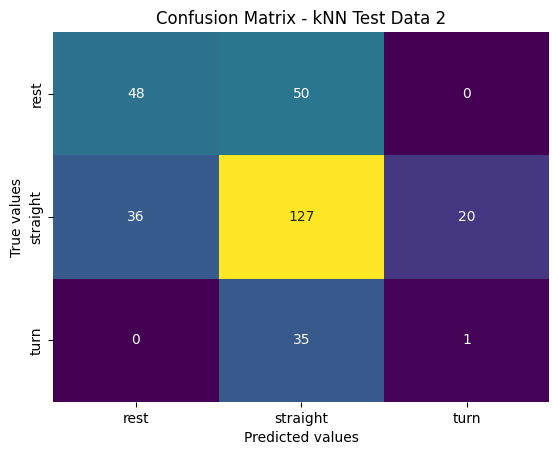


Classification Report for kNN Test Data 2:
              precision    recall  f1-score   support

        rest       0.57      0.49      0.53        98
    straight       0.60      0.69      0.64       183
        turn       0.05      0.03      0.04        36

    accuracy                           0.56       317
   macro avg       0.41      0.40      0.40       317
weighted avg       0.53      0.56      0.54       317


Accuracy Score: 0.555205047318612
Precision Score: 0.4060347409404013
Recall Score: 0.403854255727792
F1 Score: 0.40186607381810574


In [27]:
evaluate_classification(y3, clf.predict(X3), ['rest', 'straight','turn'], 'kNN Test Data 2')